## Capstone Model 

Our capstone model is based off of american business data and using this data we determine the overall business health of the organizations.

Importing all the necessary functions 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sms
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

Uploading data from csv data pulled from kaggle database

In [2]:
df = pd.read_csv('DATA/american_bankruptcy_updated.csv', header=0)
df

C:\Users\ztillery\Anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,company_name,status_label,Final Year of Recorded Data,year,current_assets,cogs,depr_amort,ebitda,inventory,net_income,...,net_sales,total_assets,total_debt_long,ebit,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses
0,C_1,alive,N,1999,511.267,833.107,18.373,89.031,336.018,35.163,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,N,2000,485.856,713.811,18.577,64.367,320.590,18.531,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,N,2001,436.656,526.477,22.496,27.207,286.588,-58.939,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,N,2002,396.412,496.747,27.172,30.745,259.954,-12.410,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,N,2003,432.204,523.302,26.680,47.491,247.245,3.504,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,NaN,2014,233.211,43.338,14.094,45.615,3.376,25.261,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,NaN,2015,105.559,59.184,42.592,202.133,2.288,129.688,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,NaN,2016,63.971,69.074,65.057,79.051,2.581,-1.442,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,NaN,2017,135.207,66.527,65.330,69.171,2.013,-20.401,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


Creating ratios and rating that are built from financial data listed in the dataset. We determined these rations to cover three major aspects of business, Solvency, Liquidity, Profitability. These ratings were determined by comparing the results to that of other businesses. The solvency, liquidity, and profitability ratings are then added up to get the overall business health of the organization. This overal business helath is what will be used as the target variable for the model. 

In [3]:
df["EBIT/TOTAL_ASSETS"] = df["ebit"] / df["total_assets"]
df["NET_SALES/TOTAL_ASSETS"] = df["net_sales"] / df["total_assets"]
df["WORKING_CAPITAL/TOTAL_ASSETS"] = (df["current_assets"]- df["total_current_liabilities"]) / df["total_assets"]
df["SOLVENCY_RATING"] = 0
df["CURRENT_ASSETS/CURRENT_LIABILITIES"] = df["current_assets"] / df["total_current_liabilities"]
df["LIQUIDITY_RATING"] = 0 
df["NET_SALES-COGS"] = (df["net_sales"] - df["cogs"]) / df["net_sales"]
df["PROFITABILITY_RATING"] = 0
df["BUSINESS_HEALTH"] = 0

Dropping the categorical columns that do not effect the performance of the dataset as well as dropping the columns that were used to find the ratios that determine the necessary ratings. 

In [4]:
df = df.drop(columns = ['ebit'])
df = df.drop(columns = ['total_assets']) 
df = df.drop(columns = ['net_sales'])
df = df.drop(columns = ['total_current_liabilities'])
df = df.drop(columns = ['retained_earnings'])
df = df.drop(columns = ['status_label'])
df = df.drop(columns = ['current_assets'])
df = df.drop(columns = ['cogs'])


In [5]:
df 

,company_name,Final Year of Recorded Data,year,depr_amort,ebitda,inventory,net_income,total_receivables,market_value,total_debt_long,...,total_operating_expenses,EBIT/TOTAL_ASSETS,NET_SALES/TOTAL_ASSETS,WORKING_CAPITAL/TOTAL_ASSETS,SOLVENCY_RATING,CURRENT_ASSETS/CURRENT_LIABILITIES,LIQUIDITY_RATING,NET_SALES-COGS,PROFITABILITY_RATING,BUSINESS_HEALTH
0,C_1,N,1999,18.373,89.031,336.018,35.163,128.348,372.7519,180.447,...,935.302,0.095355,1.382369,0.468896,0,3.120983,0,0.186683,0,0
1,C_1,N,2000,18.577,64.367,320.590,18.531,115.187,377.1180,179.987,...,809.888,0.065241,1.245637,0.513588,0,3.874697,0,0.183521,0,0
2,C_1,N,2001,22.496,27.207,286.588,-58.939,77.528,364.5928,217.699,...,611.514,0.006633,0.899355,0.402974,0,2.902063,0,0.175732,0,0
3,C_1,N,2002,27.172,30.745,259.954,-12.410,66.322,143.3295,164.658,...,575.592,0.005204,0.883074,0.280849,0,1.947253,0,0.180741,0,0
4,C_1,N,2003,26.680,47.491,247.245,3.504,104.661,308.9071,248.666,...,604.467,0.029341,0.919167,0.424286,0,3.292707,0,0.197338,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,NaN,2014,14.094,45.615,3.376,25.261,22.846,756.4827,184.666,...,58.608,0.028679,0.094826,0.186529,0,8.270773,0,0.584180,0,0
78678,C_8971,NaN,2015,42.592,202.133,2.288,129.688,54.611,527.5750,770.103,...,89.020,0.085502,0.156037,0.009342,0,1.197792,0,0.796725,0,0
78679,C_8971,NaN,2016,65.057,79.051,2.581,-1.442,42.467,578.8868,683.985,...,90.807,0.008014,0.097271,-0.012481,0,0.745887,0,0.593343,0,0
78680,C_8971,NaN,2017,65.330,69.171,2.013,-20.401,27.217,412.6241,694.035,...,92.713,0.002212,0.093245,0.030641,0,1.648665,0,0.589045,0,0


Finding the solvency rating by testing the value of three ratios and comparing them to business averages. If the ratio's value is bad compared to average business the solvency rating stays at 0. If the value is good then the solvency rating increases by 1 and finally if the value of the raito is great then the solvency rating increases by 2. The solvency rating is a combination of three different ratios so this is done for all three of the ratios. This rating can have integer values from 0 to 5 

In [6]:
df.loc[((df['EBIT/TOTAL_ASSETS'] > .05 ) & (df['EBIT/TOTAL_ASSETS'] < .20)), ['SOLVENCY_RATING'] ] += 1
df.loc[((df['EBIT/TOTAL_ASSETS'] > .2)), ['SOLVENCY_RATING']] += 2

df.loc[((df['NET_SALES/TOTAL_ASSETS'] > .25 ) & (df['NET_SALES/TOTAL_ASSETS'] < .50)), ['SOLVENCY_RATING'] ] += 1
df.loc[((df['NET_SALES/TOTAL_ASSETS'] > .50 )), ['SOLVENCY_RATING']] += 2

df.loc[((df['WORKING_CAPITAL/TOTAL_ASSETS'] > 1.5 ) & (df['WORKING_CAPITAL/TOTAL_ASSETS'] < 2)), ['SOLVENCY_RATING'] ] += 1



In [7]:
df['SOLVENCY_RATING'].value_counts()

2    29287
3    28328
0     8744
1     7359
4     4964
Name: SOLVENCY_RATING, dtype: int64

A similar process is done for the liquidity rating however there is only one raito that determines the liquidity rating. This rating can have integer values from 0 to 2

In [8]:
df.loc[((df['CURRENT_ASSETS/CURRENT_LIABILITIES'] > 1.2 ) & (df['CURRENT_ASSETS/CURRENT_LIABILITIES'] < 2)), ['LIQUIDITY_RATING'] ] += 1
df.loc[((df['CURRENT_ASSETS/CURRENT_LIABILITIES'] > 2 )), ['LIQUIDITY_RATING'] ] += 2

In [9]:
df['LIQUIDITY_RATING'].value_counts()

2    37057
1    20844
0    20781
Name: LIQUIDITY_RATING, dtype: int64

A similar process is done for the profitability rating however there is only one raito that determines the profitability rating.This rating can have integer values from 0 to 2  

In [10]:
df.loc[((df['NET_SALES-COGS'] > .50 ) & (df['NET_SALES-COGS'] < .70)), ['PROFITABILITY_RATING'] ] += 1
df.loc[((df['NET_SALES-COGS'] > .70 )), ['PROFITABILITY_RATING']] += 2


In [11]:
df['PROFITABILITY_RATING'].value_counts()

0    55842
1    13767
2     9073
Name: PROFITABILITY_RATING, dtype: int64

The overall Business health is determined by adding the solvency rating, liquidity rating and profitability rating. This rating can have integer values from 0 to 9 

In [12]:
df["BUSINESS_HEALTH"] = (df['SOLVENCY_RATING'] + df['LIQUIDITY_RATING'] + df['PROFITABILITY_RATING'])

In [13]:
df['BUSINESS_HEALTH'].value_counts()

4    20691
5    16678
3    14622
2    12923
6     6634
1     2547
7     2125
0     1893
8      569
Name: BUSINESS_HEALTH, dtype: int64

Because this dataset has values from multiple years from each company we decided to keep only the first years performance for each company listed

df_co = df.drop_duplicates(subset=["company_name"], keep = 'last')

df_co

In [14]:
#df_company = df[df["company_name"].value_counts() > 1]
eligable_company = []

df_co = df.groupby('company_name')['year'].nunique()
eligable_company = df_co.loc[df.groupby('company_name')['year'].nunique() > 1]

comp_list = eligable_company.index.values.tolist()
df_company = df[df['company_name'].isin(comp_list)]

df_company = df_company.groupby('company_name').tail(2)
df_company



,company_name,Final Year of Recorded Data,year,depr_amort,ebitda,inventory,net_income,total_receivables,market_value,total_debt_long,...,total_operating_expenses,EBIT/TOTAL_ASSETS,NET_SALES/TOTAL_ASSETS,WORKING_CAPITAL/TOTAL_ASSETS,SOLVENCY_RATING,CURRENT_ASSETS/CURRENT_LIABILITIES,LIQUIDITY_RATING,NET_SALES-COGS,PROFITABILITY_RATING,BUSINESS_HEALTH
17,C_1,N,2016,71.000,148.200,601.100,56.500,251.400,1200.3288,155.300,...,1619.400,0.051326,1.175188,0.367928,3,2.651447,2,0.195123,0,5
18,C_1,Y,2017,40.500,126.500,547.900,15.600,203.000,1551.4580,177.200,...,1621.800,0.056405,1.146652,0.399685,3,2.828383,2,0.191672,0,5
29,C_2,NaN,2009,66.400,84.700,131.100,-474.300,200.300,805.6440,651.000,...,912.000,0.013620,0.741813,0.494344,2,3.814407,2,0.397512,0,4
30,C_2,NaN,2010,61.500,121.400,106.400,62.000,252.500,1231.5240,650.800,...,1035.200,0.040624,0.784401,0.555443,2,3.836855,2,0.414491,0,4
38,C_3,NaN,2007,0.500,-0.432,6.395,-4.673,5.031,30.4793,5.822,...,29.152,-0.034301,1.057009,0.264804,2,2.149545,2,0.387570,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78670,C_8969,NaN,2018,156.600,412.700,188.100,-324.400,382.400,2985.1014,5350.700,...,1548.300,0.027240,0.208584,0.142499,0,2.172604,2,0.507037,1,3
78675,C_8970,NaN,2017,62.100,567.300,239.800,273.300,308.800,7563.1327,1442.300,...,1840.900,0.198741,0.947364,0.224980,3,2.241102,2,0.472801,0,5
78676,C_8970,NaN,2018,82.500,619.000,280.300,434.900,340.300,7543.5153,1409.500,...,2112.700,0.190912,0.972066,0.146182,3,1.788786,1,0.459714,0,4
78680,C_8971,NaN,2017,65.330,69.171,2.013,-20.401,27.217,412.6241,694.035,...,92.713,0.002212,0.093245,0.030641,0,1.648665,1,0.589045,1,2


temp_df = df_company.loc[df['company_name'] == "C_2"]
temp_df.reset_index(inplace = True)   
temp_df.head()
for index, rows in temp_df.iterrows():
    if index == 0:
        print(temp_df['BUSINESS_HEALTH'][1])
    else:
        print(-1)

In [15]:
company_names = df_company.company_name.unique().tolist()
target = []
for company_name in company_names:
    temp_df = df_company.loc[df['company_name'] == company_name]
    temp_df.reset_index(inplace = True)
    for index, rows in temp_df.iterrows():
        if index == 0:
            #print(temp_df['BUSINESS_HEALTH'][1])
            target.append(temp_df['BUSINESS_HEALTH'][1])
        else:
            target.append(-1)

In [16]:
print(target)


[5, -1, 4, -1, 2, -1, 5, -1, 2, -1, 3, -1, 6, -1, 5, -1, 0, -1, 4, -1, 3, -1, 4, -1, 3, -1, 1, -1, 5, -1, 5, -1, 5, -1, 4, -1, 4, -1, 4, -1, 3, -1, 5, -1, 2, -1, 4, -1, 3, -1, 3, -1, 2, -1, 3, -1, 6, -1, 6, -1, 3, -1, 4, -1, 6, -1, 5, -1, 3, -1, 0, -1, 2, -1, 2, -1, 3, -1, 4, -1, 6, -1, 4, -1, 3, -1, 4, -1, 4, -1, 7, -1, 3, -1, 6, -1, 4, -1, 4, -1, 3, -1, 3, -1, 5, -1, 4, -1, 3, -1, 5, -1, 0, -1, 5, -1, 7, -1, 2, -1, 6, -1, 5, -1, 5, -1, 4, -1, 4, -1, 6, -1, 4, -1, 5, -1, 3, -1, 5, -1, 1, -1, 4, -1, 2, -1, 4, -1, 6, -1, 3, -1, 3, -1, 2, -1, 5, -1, 4, -1, 4, -1, 5, -1, 1, -1, 2, -1, 6, -1, 3, -1, 3, -1, 3, -1, 2, -1, 3, -1, 1, -1, 5, -1, 4, -1, 0, -1, 5, -1, 4, -1, 3, -1, 6, -1, 3, -1, 4, -1, 3, -1, 1, -1, 3, -1, 5, -1, 4, -1, 4, -1, 5, -1, 4, -1, 4, -1, 2, -1, 5, -1, 5, -1, 2, -1, 0, -1, 4, -1, 4, -1, 3, -1, 2, -1, 5, -1, 4, -1, 5, -1, 2, -1, 2, -1, 3, -1, 4, -1, 5, -1, 4, -1, 5, -1, 4, -1, 3, -1, 3, -1, 5, -1, 2, -1, 5, -1, 4, -1, 4, -1, 5, -1, 5, -1, 3, -1, 3, -1, 3, -1, 5, -1, 2, -1

In [17]:
df_company['NEXT_YEAR_BUSINESS_HEALTH'] = target

In [18]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16432 entries, 17 to 78681
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   company_name                        16432 non-null  object 
 1   Final Year of Recorded Data         6 non-null      object 
 2   year                                16432 non-null  int64  
 3   depr_amort                          16432 non-null  float64
 4   ebitda                              16432 non-null  float64
 5   inventory                           16432 non-null  float64
 6   net_income                          16432 non-null  float64
 7   total_receivables                   16432 non-null  float64
 8   market_value                        16432 non-null  float64
 9   total_debt_long                     16432 non-null  float64
 10  gross_profit                        16432 non-null  float64
 11  total_revenue                       1643

In [31]:
df_company = df_company.query("NEXT_YEAR_BUSINESS_HEALTH != -1")
df_sub = df_company.drop(["company_name", "Final Year of Recorded Data", "year"], axis =1)


In [32]:
df_sub

,depr_amort,ebitda,inventory,net_income,total_receivables,market_value,total_debt_long,gross_profit,total_revenue,total_liabilities,...,EBIT/TOTAL_ASSETS,NET_SALES/TOTAL_ASSETS,WORKING_CAPITAL/TOTAL_ASSETS,SOLVENCY_RATING,CURRENT_ASSETS/CURRENT_LIABILITIES,LIQUIDITY_RATING,NET_SALES-COGS,PROFITABILITY_RATING,BUSINESS_HEALTH,NEXT_YEAR_BUSINESS_HEALTH
17,71.000,148.200,601.100,56.500,251.400,1200.3288,155.300,344.900,1767.600,589.900,...,0.051326,1.175188,0.367928,3,2.651447,2,0.195123,0,5,5
29,66.400,84.700,131.100,-474.300,200.300,805.6440,651.000,396.200,996.700,987.400,...,0.013620,0.741813,0.494344,2,3.814407,2,0.397512,0,4,4
38,0.500,-0.432,6.395,-4.673,5.031,30.4793,5.822,11.131,28.720,12.296,...,-0.034301,1.057009,0.264804,2,2.149545,2,0.387570,0,4,2
47,42.873,138.914,106.958,82.544,107.847,1038.6859,0.000,424.713,653.828,203.240,...,0.103577,0.705134,0.213503,3,2.272509,2,0.649579,1,6,5
60,1007.000,262.000,557.000,-1468.000,768.000,2571.1835,10583.000,2982.000,19917.000,28927.000,...,-0.029287,0.782962,-0.042692,2,0.859472,0,0.149721,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78659,1133.000,6634.000,4217.000,4879.000,4336.000,43522.5638,8549.000,7599.000,34484.000,17256.000,...,0.209914,1.315882,0.265626,4,2.457191,2,0.220363,0,6,4
78664,0.190,-12.783,0.213,-13.116,0.030,0.1309,0.000,-0.532,0.545,2.408,...,-1.410415,0.059252,0.723853,0,3.784609,2,-0.976147,0,2,0
78669,354.200,758.100,490.400,-296.200,1156.000,2850.9981,5440.600,1942.700,3775.900,7392.400,...,0.039396,0.368294,0.121806,1,2.143799,2,0.514500,1,4,3
78675,62.100,567.300,239.800,273.300,308.800,7563.1327,1442.300,1138.600,2408.200,2136.500,...,0.198741,0.947364,0.224980,3,2.241102,2,0.472801,0,5,4


In [33]:
df_sub.corr()["NEXT_YEAR_BUSINESS_HEALTH"]

depr_amort                           -0.010286
ebitda                                0.036324
inventory                             0.026996
net_income                            0.045723
total_receivables                     0.020136
market_value                          0.063101
total_debt_long                      -0.024468
gross_profit                          0.054621
total_revenue                         0.010270
total_liabilities                    -0.023814
total_operating_expenses              0.004650
EBIT/TOTAL_ASSETS                     0.116414
NET_SALES/TOTAL_ASSETS                0.040195
WORKING_CAPITAL/TOTAL_ASSETS          0.055408
SOLVENCY_RATING                       0.556172
CURRENT_ASSETS/CURRENT_LIABILITIES   -0.007581
LIQUIDITY_RATING                      0.468840
NET_SALES-COGS                        0.048379
PROFITABILITY_RATING                  0.358122
BUSINESS_HEALTH                       0.791442
NEXT_YEAR_BUSINESS_HEALTH             1.000000
Name: NEXT_YE

## Training data performance


In [39]:
y = df_sub['NEXT_YEAR_BUSINESS_HEALTH']
X = df_sub.drop("NEXT_YEAR_BUSINESS_HEALTH", axis=1).select_dtypes("number")
#X = df_sub[['EBIT/TOTAL_ASSETS', 'NET_SALES/TOTAL_ASSETS', 'WORKING_CAPITAL/TOTAL_ASSETS','CURRENT_ASSETS/CURRENT_LIABILITIES', 'NET_SALES-COGS']]
#X = df_sub.drop(['EBIT/TOTAL_ASSETS', 'NET_SALES/TOTAL_ASSETS', 'WORKING_CAPITAL/TOTAL_ASSETS', 'NET_SALES-COGS'], axis =1)
#X = df_sub.drop(['SOLVENCY_RATING', 'LIQUIDITY_RATING', 'PROFITABILITY_RATING'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [44]:
classifier = DecisionTreeClassifier(criterion='entropy', min_samples_split = 13, max_depth=6, random_state=10)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=13,
                       random_state=10)

In [45]:
y_pred = classifier.predict(X_train) 

In [46]:
acc = accuracy_score(y_train,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label='label')
#roc_auc = auc(false_positive_rate, true_positive_rate)
#print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :56.28586332811685

Confusion Matrix
----------------


Predicted,0,1,2,3,4,5,6,7,8,All
True,,,,,,,,,,
0,96,33,109,2,7,0,1,0,0,248
1,18,86,120,15,10,3,1,1,0,254
2,28,60,864,190,75,15,6,1,0,1239
3,6,18,272,506,255,59,8,2,0,1126
4,6,4,114,200,758,228,30,3,2,1345
5,0,0,29,45,217,620,69,6,0,986
6,0,2,9,6,43,88,226,27,0,401
7,1,0,1,1,6,13,34,63,5,124
8,0,0,0,0,0,1,2,7,18,28


## Testing Data performance

In [47]:
y_pred = classifier.predict(X_test) 
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label='label')
#roc_auc = auc(false_positive_rate, true_positive_rate)
#print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :52.21095334685598

Confusion Matrix
----------------


Predicted,0,1,2,3,4,5,6,7,8,All
True,,,,,,,,,,
0,34,23,43,2,4,0,0,0,0,106
1,8,26,55,7,7,0,1,1,0,105
2,17,13,330,71,59,5,1,1,2,499
3,0,10,95,202,122,27,4,1,0,461
4,1,4,56,98,300,106,18,2,0,585
5,0,0,12,17,96,264,34,11,0,434
6,0,1,9,4,20,62,101,9,1,207
7,0,0,0,0,3,6,15,26,3,53
8,0,0,1,0,0,1,4,5,4,15


## Test Cells


<AxesSubplot:>

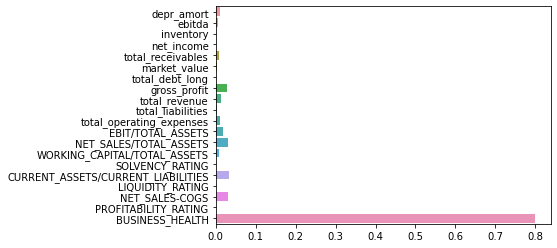

In [48]:
sms.barplot(y=X_train.columns, x = classifier.feature_importances_)

from sklearn.metrics import r2_score, mean_squared_error

# TESTING CELLS WILL DELETE
def performance(y1_true, y1_predict):
    """ 
    Calculates and returns the two performance scores between 
    true and predicted values - first R-Squared, then RMSE
    """

    # Calculate the r2 score between 'y_true' and 'y_predict'
    r2 = r2_score(y1_true, y1_predict)

    # Calculate the root mean squared error between 'y_true' and 'y_predict'
    rmse = mean_squared_error(y1_true, y1_predict, squared=False)

    # If using an older version of sklearn:
    # rmse = np.sqrt(mean_squared_error(y_true, y_predict))

    # Return the score
    return [r2, rmse]

In [28]:
y1 = df_sub['BUSINESS_HEALTH']
X1 = df_sub.drop("BUSINESS_HEALTH", axis=1).select_dtypes("number")
#X1 = df_sub[['EBIT/TOTAL_ASSETS', 'NET_SALES/TOTAL_ASSETS', 'WORKING_CAPITAL/TOTAL_ASSETS', 'NET_SALES-COGS']]


# Split into training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=45)

dt = DecisionTreeClassifier(criterion='entropy', random_state=45)  
dt.fit(X_train, y_train) 

y1_pred = dt.predict(X1_test)

# Check the AUC of predictions
acc1 = accuracy_score(y1_test,y1_pred) * 100
print('Accuracy is :{0}'.format(acc1))

print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y1_test, y1_pred, rownames=['True'], colnames=['Predicted'], margins=True)





Accuracy is :99.95943204868153

Confusion Matrix
----------------


Predicted,0,1,2,3,4,5,6,7,8,All
True,,,,,,,,,,
0,191,0,0,0,0,0,0,0,0,191
1,0,207,0,0,0,0,0,0,0,207
2,0,0,1025,0,0,0,0,0,0,1025
3,0,0,0,944,0,0,0,0,0,944
4,0,0,0,0,1156,0,0,0,0,1156
5,0,0,0,0,0,896,1,0,0,897
6,0,0,0,0,0,1,374,0,0,375
7,0,0,0,0,0,0,0,104,0,104
8,0,0,0,0,0,0,0,0,31,31


In [29]:
max_depths = list(range(1, 31))
mse_results = []
r2_results = []

for max_depth in max_depths:
    regressor = DecisionTreeClassifier(criterion='entropy', max_depth = max_depth, random_state=45)  
    
    
    regressor.fit(X1_train, y1_train) 
    y1_pred = regressor.predict(X1_test)
    score = performance(y1_test, y1_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(max_depths, mse_results, 'r', label='RMSE')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

NameError: name 'performance' is not defined

In [ ]:
#min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_splits = list(range(2, 100))
mse_results = []
r2_results = []

for min_samples_split in min_samples_splits:    
    regressor = DecisionTreeClassifier(criterion='entropy',min_samples_split=int(min_samples_split), random_state=45)  

    regressor.fit(X1_train, y1_train) 
    y1_pred = regressor.predict(X1_test)
    score = performance(y1_test, y1_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, r2_results, 'b', label='R2')
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, mse_results, 'r', label='RMSE')
plt.show()

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
mse_results = []
r2_results = []

for min_samples_leaf in min_samples_leafs:    
    regressor = DecisionTreeClassifier(criterion='entropy',min_samples_leaf= min_samples_leaf, random_state=45)  

    regressor.fit(X1_train, y1_train) 
    y1_pred = regressor.predict(X1_test)
    score = performance(y1_test, y1_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(min_samples_leafs, r2_results, 'b', label='R2')
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(min_samples_leafs, mse_results, 'r', label='RMSE')
plt.show()